# Capstone Project - Cryptocurrencies

### Phase 4b - Classifier Modeling

- Identify best classifier model for a binary target column (0, 1) based on shifted price columns for the next period in our data (1 hour)

- Use coefficients to detect best features (technical indicators) for each of the 6 cryptocurrencies

- 1. Trend visualization & prediction - regressors & ARIMA/SARIMA
- 2. Technical Indicator Evaluation - Binary classifier on if it goes up or down/stays the same
- 3. (Bonus - if there's time):  Far trend prediction with LSTM

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from tqdm import tqdm # a progress bar
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Load & Prepare Data

### With a script

In [2]:
# Script saved in this directory
# Will load all datasets (tables) from a postgres database ready for modeling

import load_data_models as data

Available data:     tablename
0     BTCUSD
1     BTC_TA
2    DASHUSD
3    DASH_TA
4     ETHUSD
5     ETH_TA
6    LINKUSD
7    LINK_TA
8     LTCUSD
9     LTC_TA
10    XLMUSD
11    XLM_TA
Data Loaded. For now just add for example btc_ta = data_loading_phase_4.btc_ta as a variable for your data.


In [3]:
# Check that they're all loaded

btc_ta = data.btc_ta
eth_ta = data.eth_ta
ltc_ta = data.ltc_ta
xlm_ta = data.xlm_ta
dash_ta = data.dash_ta
link_ta = data.link_ta

In [4]:
# Check
btc_ta.head(3)

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,973.37,973.40,969.90,970.27,184.704602,380236.4973,39274.59868,0.445885,104.338142,72.231203,2188629.816,2110318.408,-0.114886,6593.738443,965.964514,4.323042,963.1030,974.001083,952.204917,2.263119,0.828819,0,0,967.020667,970.797667,963.243667,0.781162,0.930147,0,0,952.00,973.4,962.700,2.221985,0.853738,0.378858,3.473720,2.427675,1.046045,966.175000,961.311154,966.820110,963.346390,16.886754,28.020836,14.478434,1.257214,0.741631,0.515583,0.036580,21.791615,124.315585,-3.9730,12.009431,6.817754,5.191677,967.640,961.2,964.4200,954.535,955.9675,959.59,96,12,84,961.579918,956.83,0,0,99.998222,59.422193,0.703923,0.901308,0.897453,16.089334,67.274373,85.312060,94.178094,-14.687940,8.227529,964.259340,1.144597,-10.668347,-17.958664,7.290317,-0.318481,-0.318989,122.845659
2017-01-01 01:00:00,970.99,972.00,968.21,970.49,148.353801,380266.6378,39422.95248,0.462434,94.095241,68.462037,-3947017.161,2801941.807,-0.554611,6595.233514,966.478420,4.269738,963.9420,974.392856,953.491144,2.168358,0.813276,0,0,967.920667,971.552667,964.288667,0.750475,0.853708,0,0,952.07,973.4,962.735,2.212789,0.863572,0.302878,3.509162,2.643972,0.865190,967.121667,961.683462,967.384708,963.875546,17.389548,26.408382,16.211259,1.254297,0.716368,0.537930,0.040086,21.880853,100.664613,-4.7220,12.931594,8.027472,4.904123,968.535,961.2,964.8675,954.535,955.9675,959.59,92,8,84,963.234730,956.83,0,0,99.999111,59.658742,0.628205,0.777376,0.876962,16.622661,65.601182,86.344439,90.552166,-13.655561,8.783147,964.734988,1.184407,-10.641986,-16.495328,5.853342,0.022674,0.022672,122.896187
2017-01-01 02:00:00,970.49,971.99,967.00,967.95,108.436139,380199.4899,39314.51634,0.382673,41.306236,64.114705,-2807089.984,2592356.601,-0.250165,6577.972241,966.863902,4.341764,964.4145,974.691518,954.137482,2.131245,0.672010,0,0,968.490333,972.409333,964.571333,0.809301,0.431062,0,0,952.09,973.4,962.745,2.209631,0.744252,0.311866,3.294319,2.774041,0.520277,967.849167,962.049615,967.471676,964.177358,17.463735,24.416193,16.817570,1.290927,0.753366,0.537561,0.042458,22.021497,74.035061,-2.4745,13.218439,9.141321,4.077118,968.535,961.2,964.8675,954.535,956.7500,959.59,88,4,84,964.657868,956.83,0,0,99.999555,55.626812,0.309351,0.547160,0.741948,15.956595,64.018241,66.727717,79.461405,-33.272283,8.996206,964.818401,0.910114,-12.526587,-15.701580,3.174993,-0.261723,-0.262067,122.312816


# 4B: Classifier modeling

### Requirements

#### Begin with an executive summary:

- What is your goal?
- What are your metrics?
- What were your findings?
- What risks/limitations/assumptions affect these findings?
- Walk through your model step by step, starting with EDA


- What are your variables of interest?
- What outliers did you remove?
- What types of data imputation did you perform?

#### Summarize your statistical analysis, including:

- Model selection
- Implementation
- Evaluation
- Inference


Clearly document and label each section

Logically organize your information in a persuasive, informative manner
Include notebook headers and subheaders, as well as clearly formatted markdown for all written components
Include graphs/plots/visualizations with clear labels
Comment and explain the purpose of each major section/subsection of your code
Document your code for your future self, as if another person needed to replicate your approach
Host your notebook and any other materials in your own public Github Repository

Include a technical appendix, including links and explanations to any outside libraries or source code used
Host a local copy of your dataset or include a link to a remotely hosted version
BONUS

Describe how this model could be put into real world production. Consider:

- How could you continue to validate your model's performance over time?
- What steps might you need to take to productionize your model for an enterprise environment?
- How would you deploy your model publicly? 
- What could you do to setup your model and share it online right now?
- Create a blog post of at least 1000 words summarizing your approach in a tutorial format and link to it in your notebook.

In your tutorial, address a slightly less technical audience; think back to Day 1 of the program - how would you explain and walk through your capstone project to your earlier self?

### Train/test splits here will be a bit different from 4a - data here up to Jan 31st 2021 only

# Data preprocessing:

### Make the above to a preprocessing function for all currencies:

In [65]:
def coinprocess(df):
    """ Add your crypto df and return a standardized train and set sets 
        for your predictors and target variable. Specific to 
        the datasets for this project."""
    
    df['pred_price'] = np.where(df['close'].shift(1) > df['close'], 1, 0)
    
    y = df['pred_price'][1:]
    
    # Remove ohlc, shift all your predictor columns by 1:
    
    mask = ~(df.columns.isin(['open','high', 'low', 'close', 'volume', 'pred_price']))
    shift_cols = df.columns[mask]
    df2 = df.copy()
    df2[shift_cols] = df2.loc[:,mask].shift(1)
    
    pre_X = df2[shift_cols]
    X = pre_X.dropna(how='all') # need this as columns
    
    # Train-test split on first 80% of data (chronologically)
    
    X_train, X_test= np.split(X, [int(.80 *len(X))])
    y_train, y_test= np.split(y, [int(.80 *len(X))])
    
    # Min max scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.transform(X_test)
    
    return X_train_sc, X_test_sc, y_train, y_test, X.columns


# Run your classifier models

In [48]:
# Import models

# Basic Logit
from sklearn.linear_model import LogisticRegression

#SVC
from sklearn.svm import SVC

# Bagging Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Boosting Classifiers
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, plot_importance # XGB has it's own built in feature importance plotter!?

# DL Classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation metrics
from sklearn.model_selection import cross_val_score, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve, precision_recall_curve
time_cv = TimeSeriesSplit()

### Choose your Classifiers for all cryptocurrencies

- Try to find those that have a feature importance / coef parameter
- This will be important for identifying your best TIs later

In [43]:
# Choose your classifiers
# KNN for instance has no coef function - find alternatives that do

# Would they each need gridsearching first? How much computation time would that add?
# Or find good preselected configs online (SVC)

dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver="lbfgs", max_iter=1000),
    "Support Vector Machine": SVC(gamma = "auto"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=500),
    "Extra Trees": ExtraTreesClassifier(n_estimators=500, random_state=0),
    "AdaBoost": AdaBoostClassifier(n_estimators=500),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "Neural Net": MLPClassifier(solver="adam", alpha=0.0001, learning_rate="constant", learning_rate_init=0.001),
    "Naive Bayes": GaussianNB()
}

### Model function

- Don't expect the models to preform very well
- Tinker with your classifier dictionary

In [53]:
# Your classifier models function:

def batch_classify(X_train_sc, y_train, X_test_sc, y_test, dict_classifiers=dict_classifiers, verbose=True):
    
    """ Run multiple classifier models at once from a dictionary parameter. Time them
        and return their scores (train, cv mean, and test) in a dataframe. """
    
    # Your CV method (defaults to 5 splits)
    time_cv = TimeSeriesSplit()
    
    no_classifiers = len(dict_classifiers.keys())
    
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers, 4)), 
                            columns=["classifier", "train_score", "cv_mean_score", "test_score"])
    
    # Baseline scores - these are class 0
    # Sometimes won't be the majority class (if < 0.5 then 1 - val)
    baseline_train = y_train.value_counts(normalize=True)[0]
    baseline_test = y_test.value_counts(normalize=True)[0]
    
    count = 0
    
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train_sc, y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        
        train_score = classifier.score(X_train_sc, y_train)
        cv_mean_score = cross_val_score(classifier, X_train_sc, y_train, cv=time_cv).mean()
        test_score = classifier.score(X_test_sc, y_test)

        df_results.loc[count, "classifier"] = key
        df_results.loc[count, "train_score"] = train_score
        df_results.loc[count, "cv_mean_score"] = cv_mean_score
        df_results.loc[count, "test_score"] = test_score

        if verbose:
            print(f"Trained {key} in {t_diff:.2f}s\n")
            count += 1
    
    print("Baseline Train score: ", baseline_train)
    print("Baseline Test score:  ", baseline_test, "\n")
    return df_results


### Get Your Confusion Matrix, Classification Report, ROC-AUC & Precision-Recall Curves

- Use your best model (test scores or CV mean scores?)
- Run a gridsearch first on that best model if you can

In [54]:
# As a function

def get_metrics(X_train_sc, y_train, X_test_sc, y_test, 
                model):

    """ Get the confusion matrix, classification reports, ROC-AUC and Precision Recall Curves.
        Add your X_train scaled and y_train from your datasets. Be sure to add your classifier
        that has a .predict method (and preferably gridsearched). Using test sets."""
    
    model.fit(X_train_sc, y_train)

    predictions = model.predict(X_test_sc)
    
    # Confusion matrix & Classification report
    
    print(f"CV Mean score: {cross_val_score(model, X_train_sc, y_train, cv=time_cv).mean()}\n")
    print(f"Test score: {model.score(X_test_sc, y_test)}\n")
    
    print(f"accuracy score: {accuracy_score(y_test, predictions)}\n")
    print(f"confusion matrix:\n")
    print(confusion_matrix(y_test, predictions))
    print("-"*30)
    print(f"classification report:\n")
    print(classification_report(y_test, predictions))
    
    y_pred_proba = model.predict_proba(X_test_sc)[:,1]
    
    
    # ROC-AUC Plots
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    print("ROC AUC is: ", str(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()
    
    # Precision-Recall Plots
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("Precision-Recall Curve")
    plt.show()
    

# Feature importance

In [55]:
# Get the importances on its own first
# If using gs, you can pass gs.best_estimator_

def get_importances(X_train_sc, y_train, model):
    
    """Simply get your model's feature importance if they fit."""
    
    model.fit(X_train_sc, y_train)
    
    try:
        importances = model.feature_importances_ # RFC/ETC
        
    except:
        try:
            importances = model.coef_[0] # Logit
        except:
            try:
                importances = model.dual_coef_[0] # SVC
            except:
                print("Your model has no coef method.")
    
    return importances


In [68]:
# Returns a ranked df that you can plot
# Use in tandem with get_importances above
# If using gs, you can pass gs.best_estimator_

def get_features(model, X_train_sc, y_train, importances, cols):  
    
    """With your most important features saved as a list, insert them here
       and return them in a ranked DataFrame that you can then plot."""

    model.fit(X_train_sc, y_train)
    
    indices = np.argsort(importances)[::-1]

    columns = cols # Make sure these match your X_train_sc cols
    
    idx = list(range(len(columns)))
    custom_dict = {idx[i]: columns[i] for i in range(len(columns))}
    
    reordered_dict = {k: custom_dict[k] for k in indices}
    rereordered_dict = dict([(value, key) for key, value in reordered_dict.items()]) 
    
    feature_df1 = pd.DataFrame(rereordered_dict, index = range(len(rereordered_dict)))
    feature_df = feature_df1.transpose()
    
    feature_df.drop(columns=range(1, len(feature_df)), inplace=True)
    feature_df['Technical_Indicator'] = feature_df.index
    feature_df.rename(columns = {0: "rank"}, inplace=True)
    feature_df['Importance'] = importances[indices]
    feature_df['index'] = range(len(feature_df))
    feature_df.set_index('index', inplace=True)
    feature_df.drop(columns='rank', inplace=True)
    
    return feature_df


### BTC

- Redo from coinprocess

In [69]:
# Save them to 4 variables in order of function
# You'll need btc_cols for get_features later

btc_tr, btc_test, btc_ytr, btc_ytest, btc_cols = coinprocess(btc_ta)


In [67]:
btc_tr.shape, btc_test.shape, btc_ytr.shape, btc_ytest.shape


((35582, 83), (8896, 83), (35582,), (8896,))

In [45]:
# Saved as a df
# Xtr, ytr, xtest, ytest

btc_results = batch_classify(btc_tr, btc_ytr, btc_test, btc_ytest)

print("Classifier Results: \n")
print(btc_results.sort_values(by="test_score", ascending=False))


Trained Logistic Regression in 9.08s

Trained Support Vector Machine in 225.31s

Trained Decision Tree in 7.04s

Trained Random Forest in 210.61s

Trained Extra Trees in 63.94s

Trained AdaBoost in 197.56s

Trained XGBoost in 110.12s

Trained Neural Net in 187.00s

Trained Naive Bayes in 0.32s

Baseline Train score:  0.5222303411837446
Baseline Test score:   0.5164118705035972 

Classifier Results: 

               classifier  train_score  cv_mean_score  test_score
4             Extra Trees     1.000000       0.524081    0.535297
3           Random Forest     1.000000       0.523642    0.532374
2           Decision Tree     1.000000       0.506981    0.513264
1  Support Vector Machine     0.545304       0.531602    0.511353
7              Neural Net     0.617391       0.525801    0.504834
8             Naive Bayes     0.529341       0.516661    0.499663
6                 XGBoost     0.810438       0.518111    0.498988
0     Logistic Regression     0.551065       0.528499    0.493480
5 

In [46]:
# Make param_grids per best classifier
# Random Forests & Extra Trees can use the same parameters

param_gridRFC = { 
    'n_estimators': [250, 500, 750, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 8, 10, 15, 20],
    'criterion' :['gini', 'entropy']
}


In [49]:
CV_rfc = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=param_gridRFC, cv=time_cv,
                     verbose=5, n_jobs=-2)
CV_rfc.fit(btc_tr, btc_ytr)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-2)]: Done 274 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-2)]: Done 600 out of 600 | elapsed: 44.2min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=ExtraTreesClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [250, 500, 750, 1000]},
             verbose=5)

In [50]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 1000}

In [51]:
# BTC best model configuration
CV_rfc.best_estimator_


ExtraTreesClassifier(max_depth=4, n_estimators=1000)

CV Mean score: 0.5320404721753794

Test score: 0.532261690647482

accuracy score: 0.532261690647482

confusion matrix:

[[2767 1827]
 [2334 1968]]
------------------------------
classification report:

              precision    recall  f1-score   support

           0       0.54      0.60      0.57      4594
           1       0.52      0.46      0.49      4302

    accuracy                           0.53      8896
   macro avg       0.53      0.53      0.53      8896
weighted avg       0.53      0.53      0.53      8896

ROC AUC is:  0.548310492107932


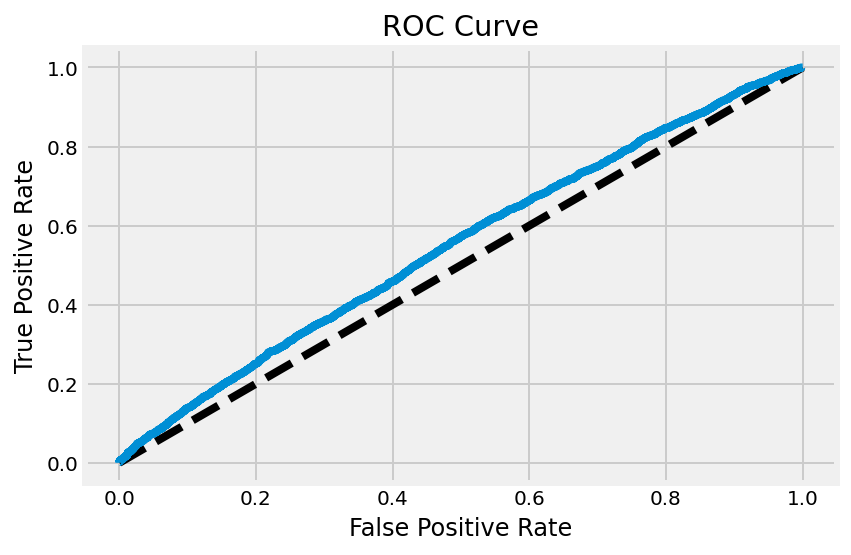

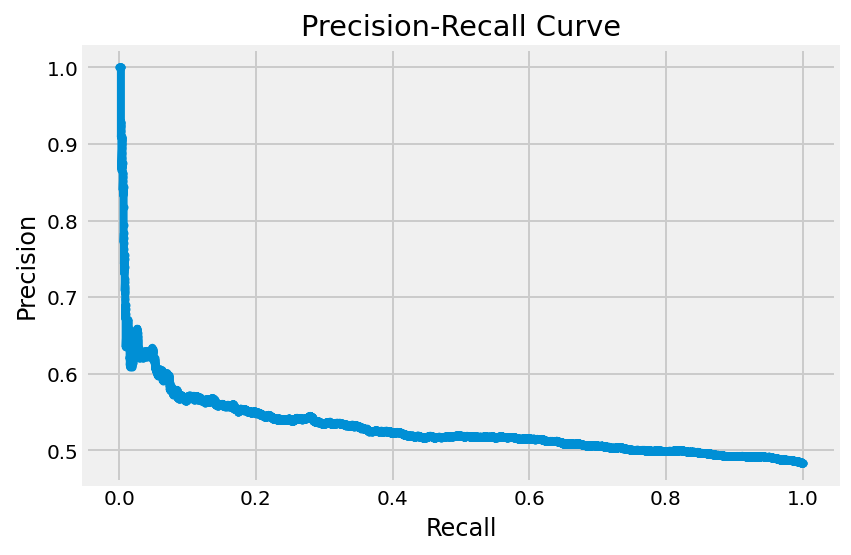

In [57]:
# Use get_metrics with btc, use .best_params_ in classifier

get_metrics(btc_tr, btc_ytr, btc_test, btc_ytest, CV_rfc.best_estimator_)


In [58]:
btc_importances = get_importances(btc_tr, btc_ytr, CV_rfc.best_estimator_)


In [70]:
# Save it as a variable
# note the btc_cols from earlier

btc_features = get_features(CV_rfc.best_estimator_, btc_tr, btc_ytr,  btc_importances, btc_cols)


In [71]:
btc_features


,Technical_Indicator,Importance
index,,
0,momentum_stoch_rsi,0.182973
1,momentum_stoch,0.077985
2,momentum_wr,0.073752
3,volatility_kcli,0.072239
4,volatility_kchi,0.052764
...,...,...
78,volume_fi,0.001323
79,volatility_dcw,0.001296
80,volume_sma_em,0.001197


''

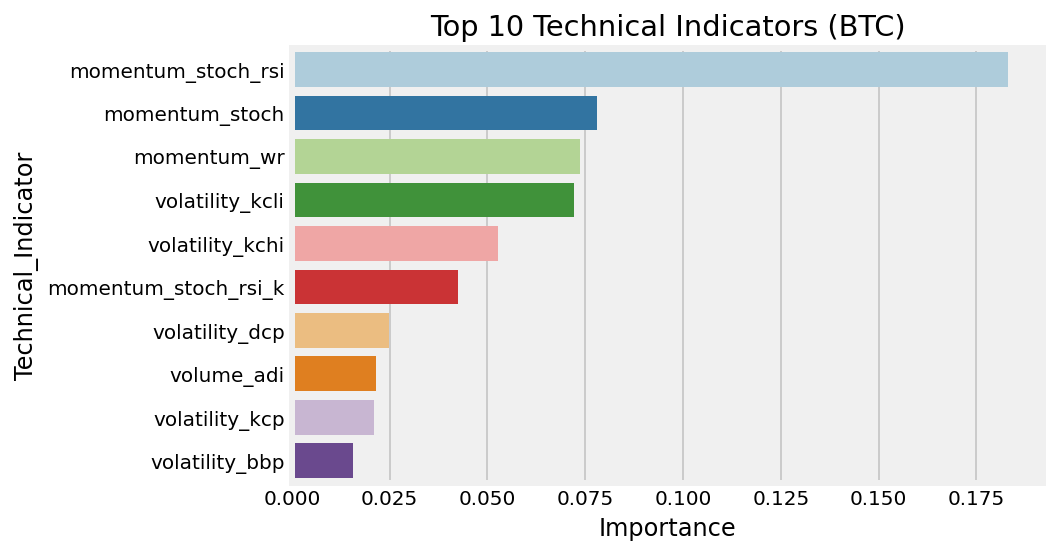

In [72]:
# Plot them

sns.barplot(data=btc_features.head(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Top 10 Technical Indicators (BTC)")
;

''

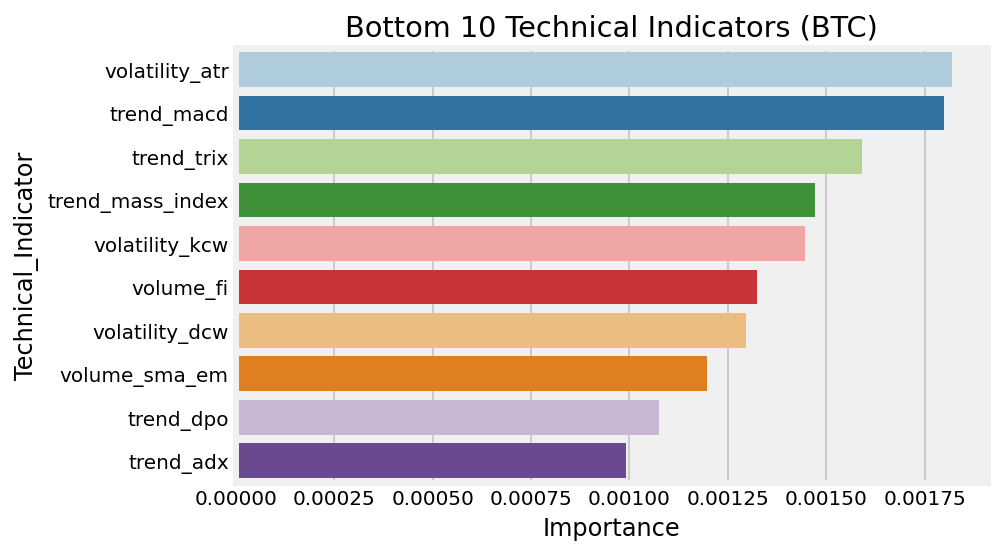

In [73]:
# Worst

sns.barplot(data=btc_features.tail(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Bottom 10 Technical Indicators (BTC)")
;

### ETH

In [74]:
# Process

eth_tr, eth_test, eth_ytr, eth_ytest, eth_cols = coinprocess(eth_ta)


In [75]:
# Get model scores, find best model

eth_results = batch_classify(eth_tr, eth_ytr, eth_test, eth_ytest)

print("Classifier Results: \n")
print(eth_results.sort_values(by="test_score", ascending=False))


Trained Logistic Regression in 11.18s

Trained Support Vector Machine in 220.97s

Trained Decision Tree in 5.68s

Trained Random Forest in 208.83s

Trained Extra Trees in 60.58s

Trained AdaBoost in 167.26s

Trained XGBoost in 88.78s

Trained Neural Net in 178.78s

Trained Naive Bayes in 0.27s

Baseline Train score:  0.5162821839430276
Baseline Test score:   0.5161290322580645 

Classifier Results: 

               classifier  train_score  cv_mean_score  test_score
3           Random Forest     1.000000       0.527210    0.531102
4             Extra Trees     1.000000       0.518955    0.529641
7              Neural Net     0.615010       0.519905    0.528911
6                 XGBoost     0.816027       0.516435    0.528180
1  Support Vector Machine     0.542060       0.530460    0.527206
0     Logistic Regression     0.550490       0.527648    0.525380
2           Decision Tree     1.000000       0.500548    0.501400
8             Naive Bayes     0.504291       0.503616    0.495557
5 

In [77]:
# Also RForests, so we can reuse the param_gridRFC from earlier

CV_rfc2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_gridRFC, cv=time_cv,
                     verbose=5, n_jobs=-2)
CV_rfc2.fit(eth_tr, eth_ytr)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-2)]: Done 274 tasks      | elapsed: 63.0min
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed: 95.4min
[Parallel(n_jobs=-2)]: Done 600 out of 600 | elapsed: 148.0min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [250, 500, 750, 1000]},
             verbose=5)

In [78]:
CV_rfc2.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 250}

In [79]:
CV_rfc2.best_estimator_


RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=250)

CV Mean score: 0.5361212563915266

Test score: 0.5386488131466829

accuracy score: 0.5386488131466829

confusion matrix:

[[2237 2003]
 [1787 2188]]
------------------------------
classification report:

              precision    recall  f1-score   support

           0       0.56      0.53      0.54      4240
           1       0.52      0.55      0.54      3975

    accuracy                           0.54      8215
   macro avg       0.54      0.54      0.54      8215
weighted avg       0.54      0.54      0.54      8215

ROC AUC is:  0.5538846564613742


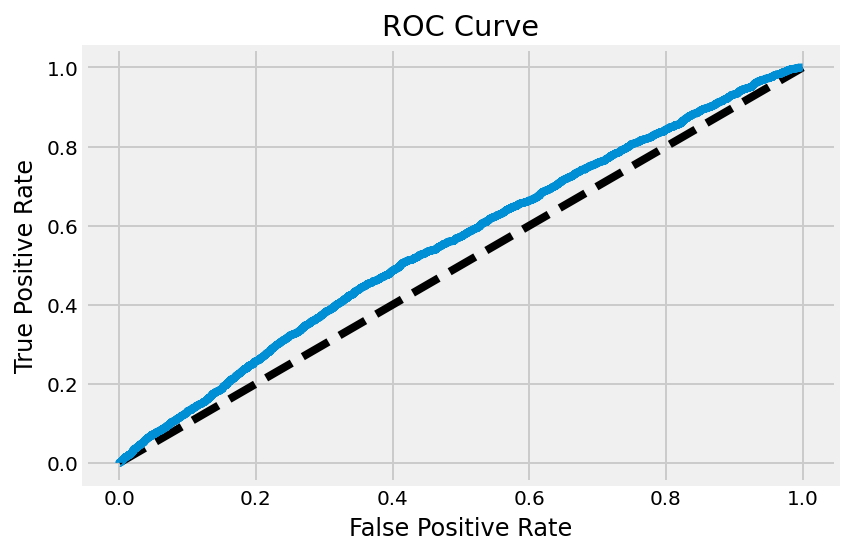

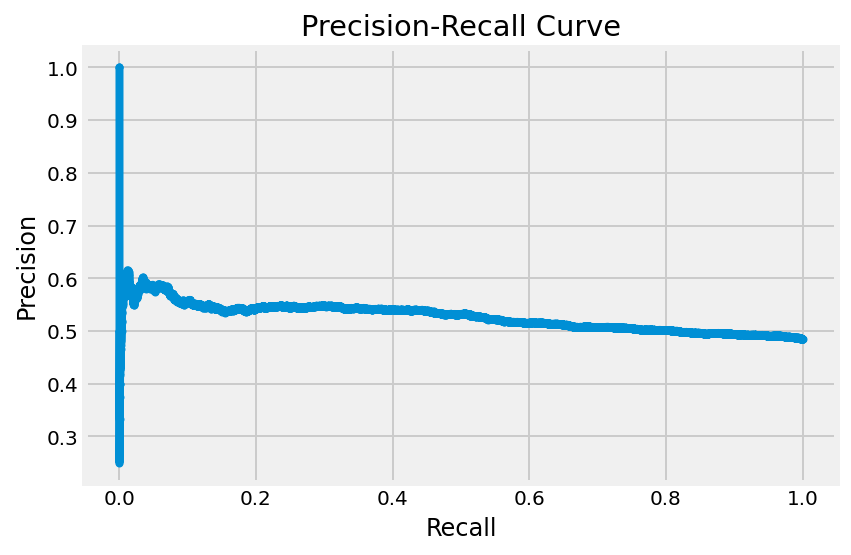

In [80]:
# Add your best GS'ed model (that has coef function)
# Re do this with 2 functions in above example

get_metrics(eth_tr, eth_ytr, eth_test, eth_ytest, CV_rfc2.best_estimator_)


In [81]:
eth_importances = get_importances(eth_tr, eth_ytr, CV_rfc2.best_estimator_)


In [82]:
# Do get_importances first, then get_features

eth_features = get_features(CV_rfc2.best_estimator_, eth_tr, eth_ytr, eth_importances, eth_cols)


In [83]:
eth_features


,Technical_Indicator,Importance
index,,
0,others_dlr,0.113570
1,others_dr,0.109510
2,volume_vpt,0.052131
3,volume_em,0.049302
4,momentum_stoch_rsi,0.046086
...,...,...
78,volatility_bbli,0.000746
79,volatility_kchi,0.000522
80,volatility_bbhi,0.000169


''

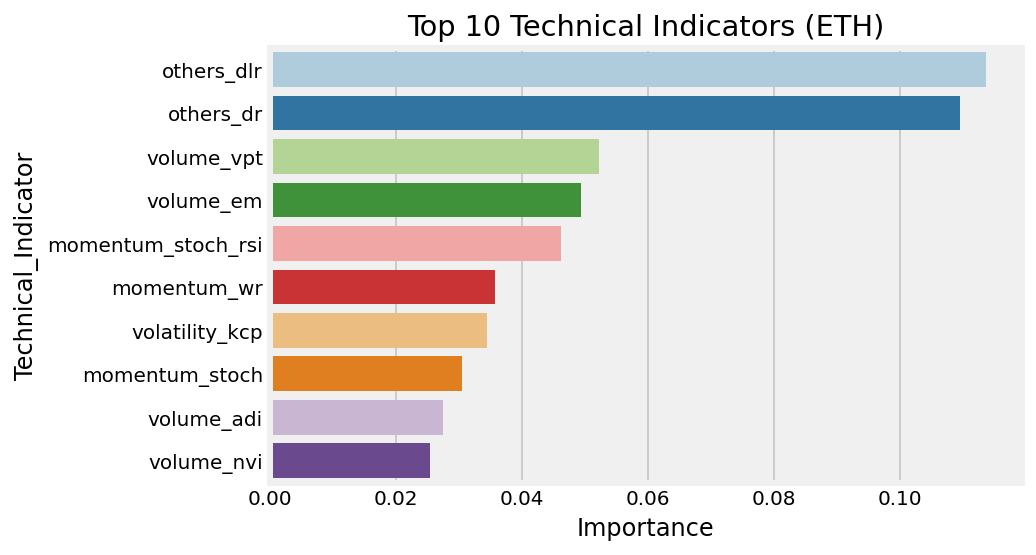

In [84]:
# Plot

sns.barplot(data=eth_features.head(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Top 10 Technical Indicators (ETH)")
;


''

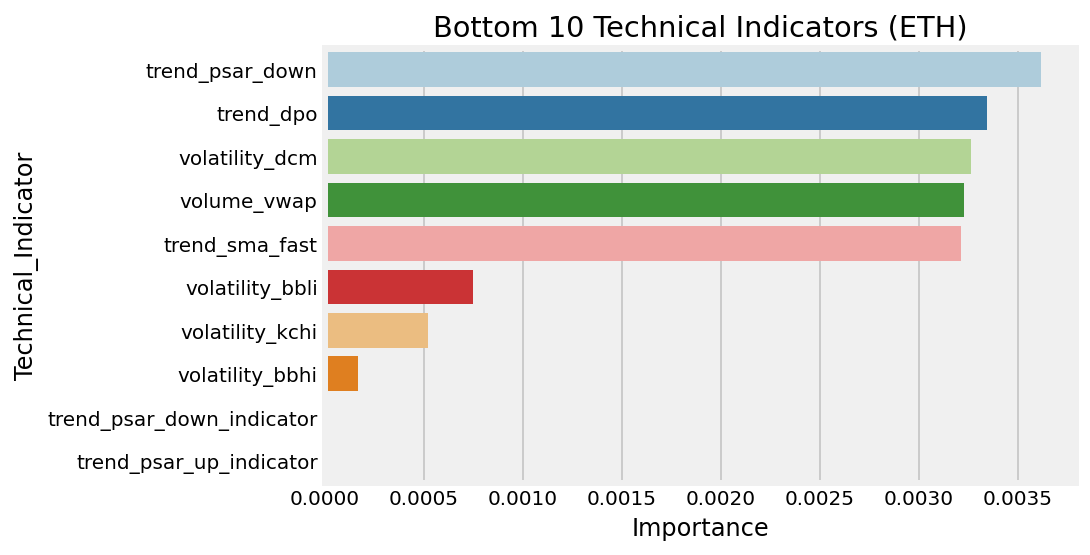

In [85]:
sns.barplot(data=eth_features.tail(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Bottom 10 Technical Indicators (ETH)")
;


### LTC

In [86]:
# Process

ltc_tr, ltc_test, ltc_ytr, ltc_ytest, ltc_cols = coinprocess(ltc_ta)


In [87]:
# Get model scores, find best model

ltc_results = batch_classify(ltc_tr, ltc_ytr, ltc_test, ltc_ytest)

print("Classifier Results: \n")
print(ltc_results.sort_values(by="test_score", ascending=False))


Trained Logistic Regression in 7.61s

Trained Support Vector Machine in 160.36s

Trained Decision Tree in 3.79s

Trained Random Forest in 134.02s

Trained Extra Trees in 42.64s

Trained AdaBoost in 167.91s

Trained XGBoost in 80.09s

Trained Neural Net in 195.11s

Trained Naive Bayes in 0.33s

Baseline Train score:  0.516477011116227
Baseline Test score:   0.5146014206787688 

Classifier Results: 

               classifier  train_score  cv_mean_score  test_score
1  Support Vector Machine     0.560975       0.532425    0.545909
0     Logistic Regression     0.566237       0.528360    0.545646
3           Random Forest     1.000000       0.531833    0.543278
4             Extra Trees     1.000000       0.529939    0.540253
8             Naive Bayes     0.539630       0.516598    0.535385
7              Neural Net     0.621193       0.517505    0.525388
6                 XGBoost     0.835559       0.522873    0.517232
2           Decision Tree     1.000000       0.503691    0.514996
5   

In [88]:
# SVC GS
# This is far too long (unfinished after 48 hours! - 375 fits)
# Will be using preselected parameters here instead:

param_gridSVC = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear', 'poly']}  # GS should be separate per kernel
  
cv_SVM = GridSearchCV(SVC(), param_gridSVC, refit = True, verbose = 5, n_jobs= -2)
# cv_SVM.fit(ltc_tr, ltc_ytr)


CV Mean score: 0.5295835800276297

Test score: 0.5469613259668509

accuracy score: 0.5469613259668509

confusion matrix:

[[1692 2220]
 [1224 2466]]
------------------------------
classification report:

              precision    recall  f1-score   support

           0       0.58      0.43      0.50      3912
           1       0.53      0.67      0.59      3690

    accuracy                           0.55      7602
   macro avg       0.55      0.55      0.54      7602
weighted avg       0.55      0.55      0.54      7602

ROC AUC is:  0.5716458219030044


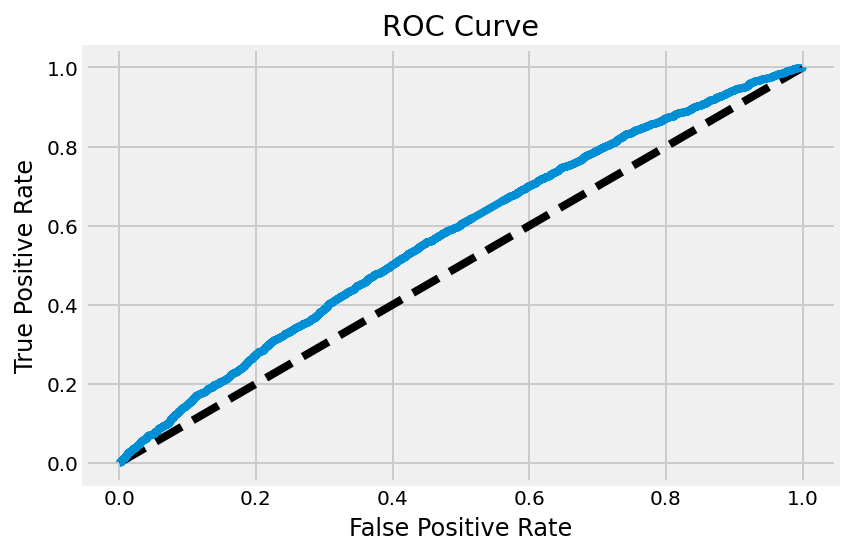

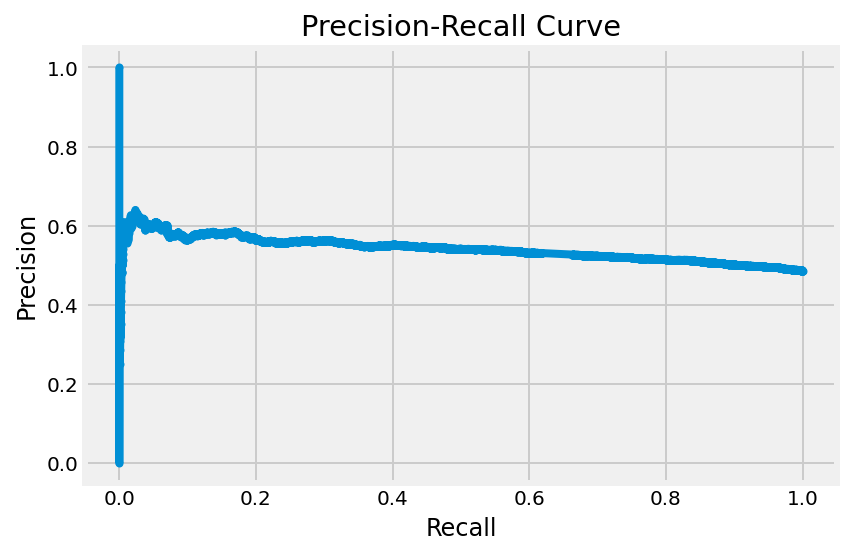

In [89]:
get_metrics(ltc_tr, ltc_ytr, ltc_test, ltc_ytest, SVC(kernel='linear', probability=True, gamma=1, C=1))


In [90]:
ltc_importances = get_importances(ltc_tr, ltc_ytr, SVC(kernel='linear', probability=True, gamma=1, C=1))


In [92]:
ltc_features = get_features(SVC(kernel='linear', probability=True, gamma=1, C=1), ltc_tr, ltc_ytr,
                            ltc_importances, ltc_cols)


In [93]:
ltc_features


,Technical_Indicator,Importance
index,,
0,momentum_rsi,2.666097
1,trend_sma_slow,1.201475
2,trend_visual_ichimoku_b,1.061513
3,trend_kst_sig,1.005043
4,trend_kst,0.888878
...,...,...
78,volatility_atr,-0.998138
79,trend_visual_ichimoku_a,-1.097188
80,trend_cci,-1.388829


''

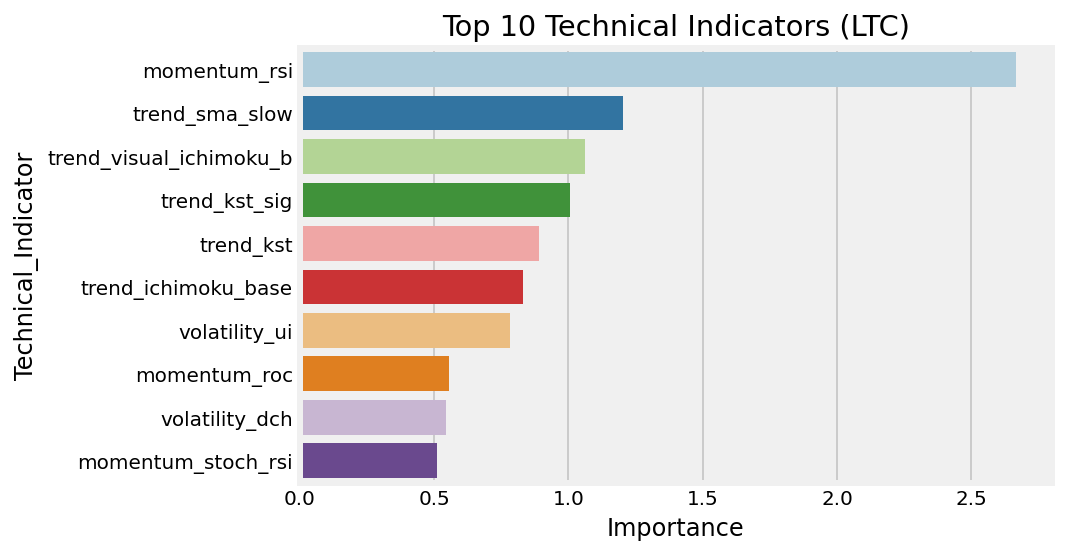

In [94]:
# Plots

sns.barplot(data=ltc_features.head(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Top 10 Technical Indicators (LTC)")
;


''

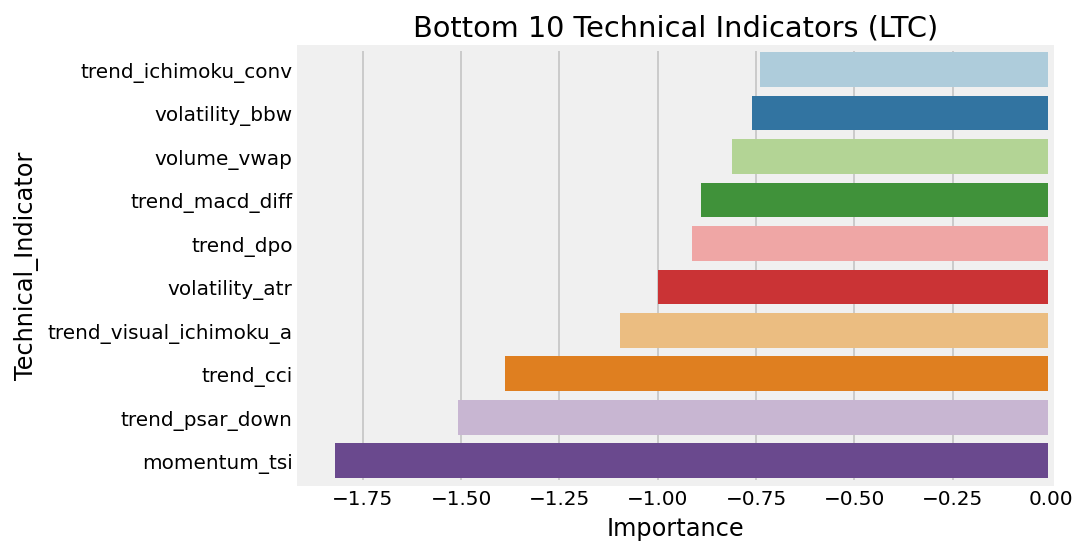

In [95]:
sns.barplot(data=ltc_features.tail(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Bottom 10 Technical Indicators (LTC)")
;


### XLM

In [96]:
# Process

xlm_tr, xlm_test, xlm_ytr, xlm_ytest, xlm_cols = coinprocess(xlm_ta)


In [97]:
# Get model scores, find best model

xlm_results = batch_classify(xlm_tr, xlm_ytr, xlm_test, xlm_ytest)

print("Classifier Results: \n")
print(xlm_results.sort_values(by="test_score", ascending=False))


Trained Logistic Regression in 4.45s

Trained Support Vector Machine in 44.66s

Trained Decision Tree in 2.40s

Trained Random Forest in 75.80s

Trained Extra Trees in 24.07s

Trained AdaBoost in 74.05s

Trained XGBoost in 37.21s

Trained Neural Net in 88.51s

Trained Naive Bayes in 0.14s

Baseline Train score:  0.500302571860817
Baseline Test score:   0.49879007864488806 

Classifier Results: 

               classifier  train_score  cv_mean_score  test_score
0     Logistic Regression     0.557489       0.515842    0.541137
2           Decision Tree     1.000000       0.497594    0.532970
3           Random Forest     1.000000       0.525465    0.532365
5                AdaBoost     0.650303       0.508942    0.532365
4             Extra Trees     1.000000       0.524376    0.531760
1  Support Vector Machine     0.543570       0.528370    0.528433
7              Neural Net     0.654690       0.510758    0.525408
6                 XGBoost     0.944856       0.522288    0.521174
8      

In [98]:
# Logistic GS

param_gridLR = {'penalty': ['l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
              'C': np.logspace(0, 5, 10)}


In [99]:
cv_LR = GridSearchCV(LogisticRegression(), param_gridLR, verbose = 5, n_jobs= -2) 
cv_LR.fit(xlm_tr, xlm_ytr)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:  9.2min finished


GridSearchCV(estimator=LogisticRegression(), n_jobs=-2,
             param_grid={'C': array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             verbose=5)

In [100]:
cv_LR.best_params_


{'C': 166.81005372000593, 'penalty': 'l2', 'solver': 'newton-cg'}

In [101]:
cv_LR.best_estimator_


LogisticRegression(C=166.81005372000593, solver='newton-cg')

CV Mean score: 0.5105764866091693

Test score: 0.5402298850574713

accuracy score: 0.5402298850574713

confusion matrix:

[[876 773]
 [747 910]]
------------------------------
classification report:

              precision    recall  f1-score   support

           0       0.54      0.53      0.54      1649
           1       0.54      0.55      0.54      1657

    accuracy                           0.54      3306
   macro avg       0.54      0.54      0.54      3306
weighted avg       0.54      0.54      0.54      3306

ROC AUC is:  0.5558545201953013


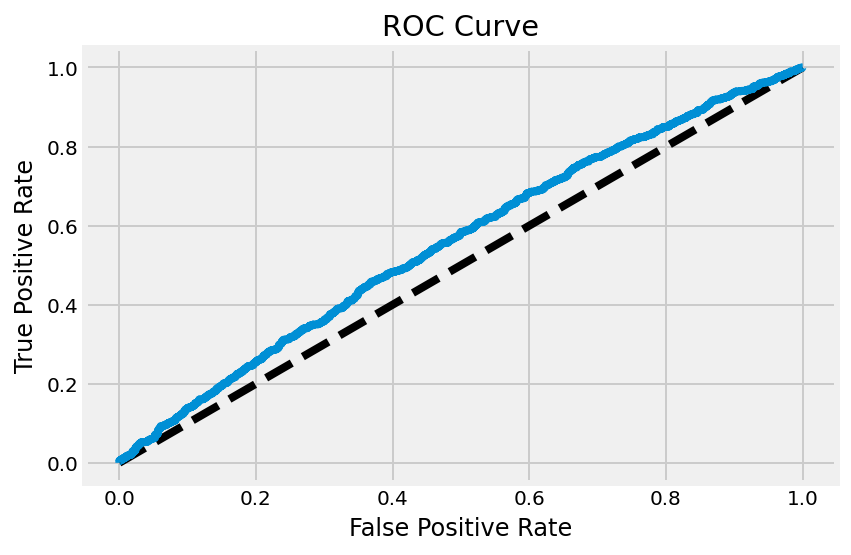

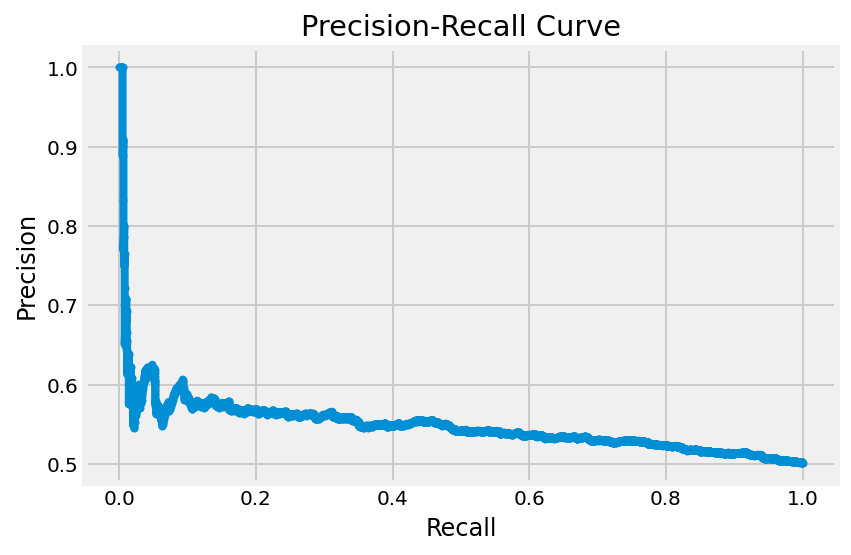

In [102]:
get_metrics(xlm_tr, xlm_ytr, xlm_test, xlm_ytest, cv_LR.best_estimator_)


In [103]:
xlm_importances = get_importances(xlm_tr, xlm_ytr, cv_LR.best_estimator_)


In [104]:
xlm_features = get_features(cv_LR.best_estimator_, xlm_tr, xlm_ytr, xlm_importances, xlm_cols)


In [105]:
xlm_features


,Technical_Indicator,Importance
index,,
0,trend_sma_slow,12.952773
1,others_dlr,6.890116
2,trend_trix,6.161475
3,momentum_rsi,3.455455
4,trend_ichimoku_b,2.941582
...,...,...
78,momentum_tsi,-2.942280
79,trend_visual_ichimoku_a,-3.018783
80,volatility_dcl,-3.284278


''

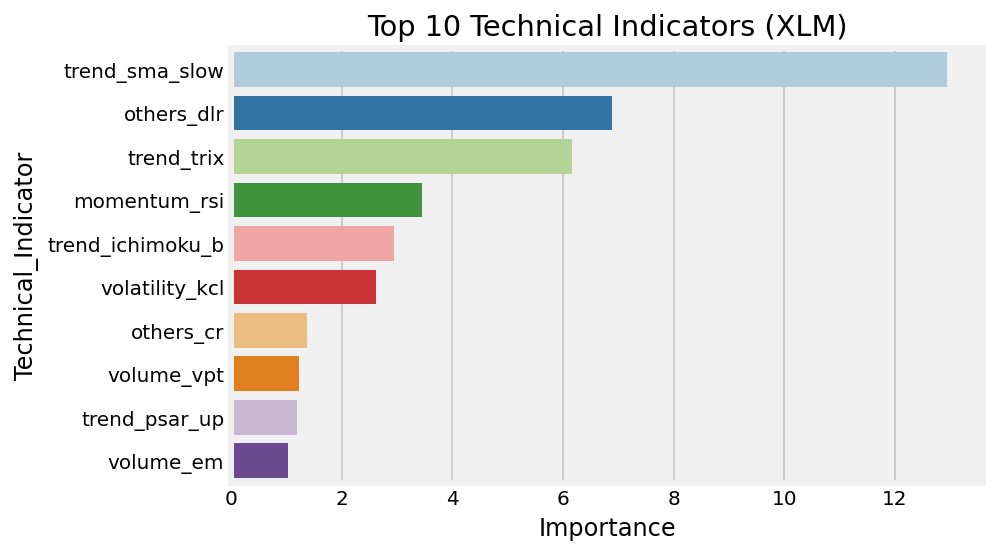

In [106]:
# Plots

sns.barplot(data=xlm_features.head(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Top 10 Technical Indicators (XLM)")
;

''

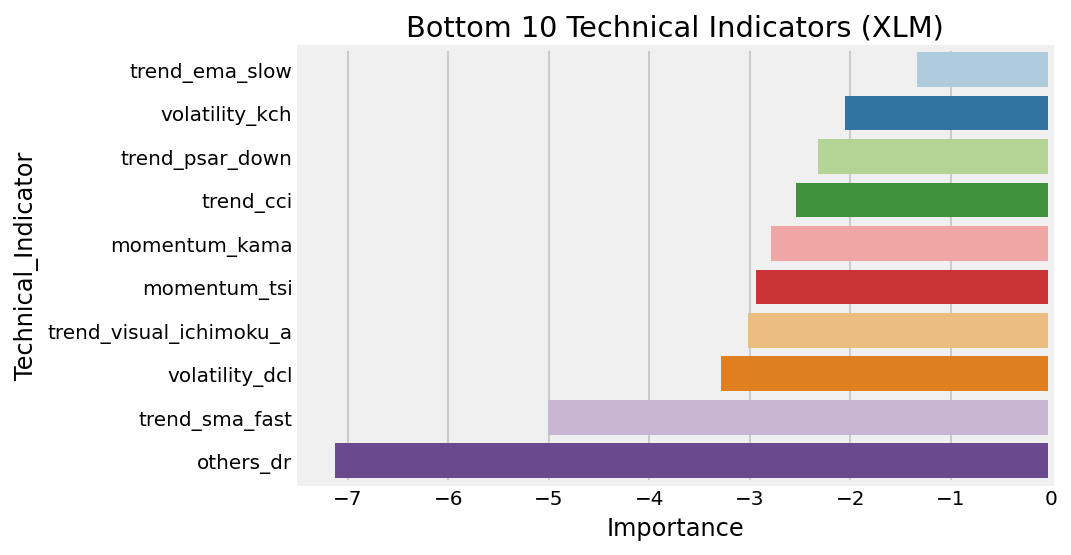

In [107]:
sns.barplot(data=xlm_features.tail(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Bottom 10 Technical Indicators (XLM)")
;

### DASH

In [108]:
# Process

dash_tr, dash_test, dash_ytr, dash_ytest, dash_cols = coinprocess(dash_ta)


In [109]:
# Get model scores, find best model

dash_results = batch_classify(dash_tr, dash_ytr, dash_test, dash_ytest)

print("Classifier Results: \n")
print(dash_results.sort_values(by="test_score", ascending=False))


Trained Logistic Regression in 3.66s

Trained Support Vector Machine in 24.59s

Trained Decision Tree in 1.47s

Trained Random Forest in 51.48s

Trained Extra Trees in 17.94s

Trained AdaBoost in 54.07s

Trained XGBoost in 26.96s

Trained Neural Net in 65.73s

Trained Naive Bayes in 0.10s

Baseline Train score:  0.5009338036937124
Baseline Test score:   0.5049792531120332 

Classifier Results: 

               classifier  train_score  cv_mean_score  test_score
0     Logistic Regression     0.558622       0.531382    0.540664
7              Neural Net     0.684686       0.525529    0.534440
4             Extra Trees     1.000000       0.530884    0.529461
1  Support Vector Machine     0.554264       0.532503    0.526141
8             Naive Bayes     0.516912       0.521669    0.523651
3           Random Forest     1.000000       0.538979    0.520747
5                AdaBoost     0.675140       0.504981    0.515768
6                 XGBoost     0.978211       0.522540    0.510788
2      

In [110]:
param_gridLR = {'penalty': ['l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
              'C': np.logspace(0, 5, 10)}


In [111]:
# Reuse Logistic GS

cv_LR2 = GridSearchCV(LogisticRegression(), param_gridLR, verbose = 5, n_jobs= -2) 
cv_LR2.fit(dash_tr, dash_ytr)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:  8.3min finished


GridSearchCV(estimator=LogisticRegression(), n_jobs=-2,
             param_grid={'C': array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             verbose=5)

In [112]:
cv_LR2.best_params_


{'C': 3.5938136638046276, 'penalty': 'l2', 'solver': 'saga'}

In [113]:
cv_LR2.best_estimator_


LogisticRegression(C=3.5938136638046276, solver='saga')

CV Mean score: 0.5321295143212952

Test score: 0.5406639004149377

accuracy score: 0.5406639004149377

confusion matrix:

[[719 498]
 [609 584]]
------------------------------
classification report:

              precision    recall  f1-score   support

           0       0.54      0.59      0.57      1217
           1       0.54      0.49      0.51      1193

    accuracy                           0.54      2410
   macro avg       0.54      0.54      0.54      2410
weighted avg       0.54      0.54      0.54      2410

ROC AUC is:  0.5459359272557461


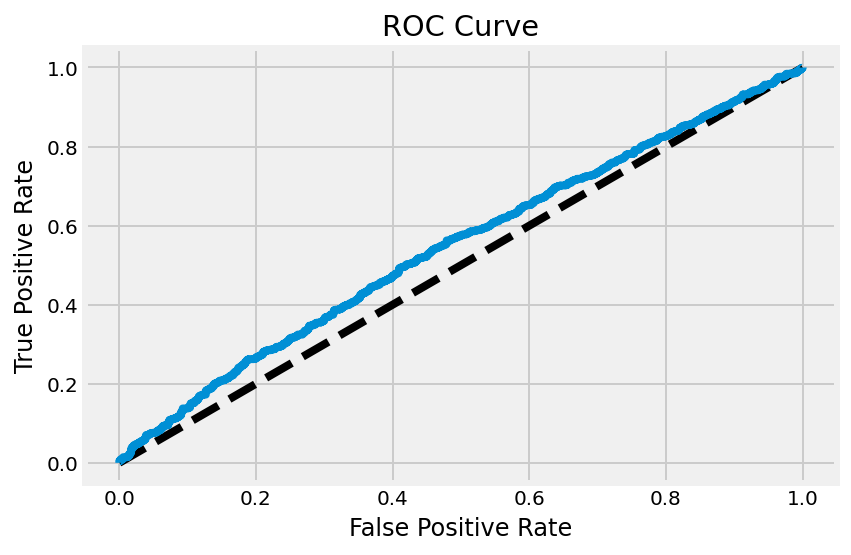

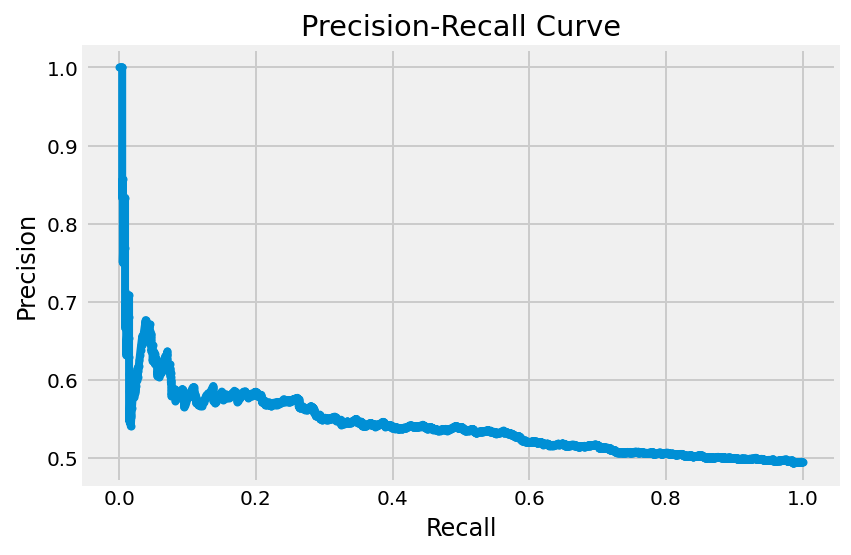

In [114]:
get_metrics(dash_tr, dash_ytr, dash_test, dash_ytest, cv_LR2.best_estimator_)


In [115]:
dash_importances = get_importances(dash_tr, dash_ytr, cv_LR2.best_estimator_)


In [116]:
dash_features = get_features(cv_LR2.best_estimator_, dash_tr, dash_ytr, dash_importances, dash_cols)


In [117]:
dash_features


,Technical_Indicator,Importance
index,,
0,momentum_rsi,1.705014
1,volume_vpt,1.137668
2,others_cr,1.076017
3,others_dr,0.941351
4,volatility_bbp,0.922820
...,...,...
78,trend_psar_down,-0.955802
79,trend_dpo,-1.304834
80,momentum_kama,-1.488210


''

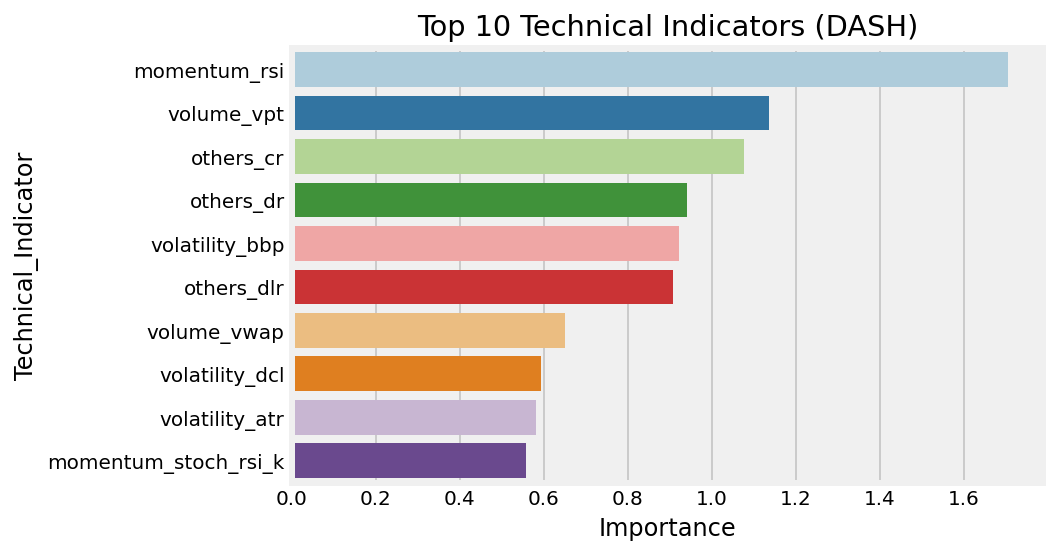

In [118]:
# Plots

sns.barplot(data=dash_features.head(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Top 10 Technical Indicators (DASH)")
;

''

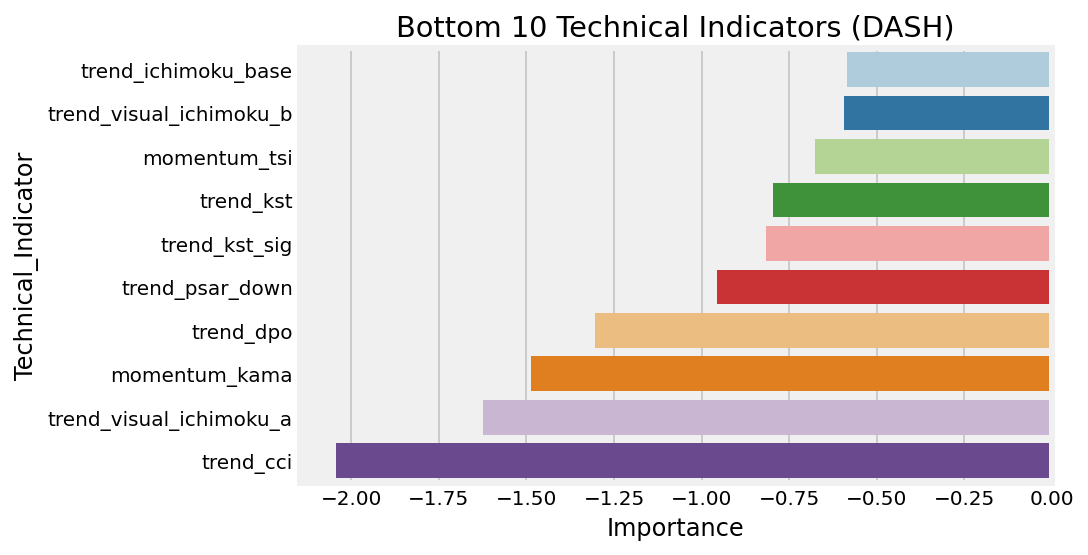

In [119]:
sns.barplot(data=dash_features.tail(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Bottom 10 Technical Indicators (DASH)")
;

### LINK

In [120]:
# Process

link_tr, link_test, link_ytr, link_ytest, link_cols = coinprocess(link_ta)

In [121]:
# Get model scores, find best model

link_results = batch_classify(link_tr, link_ytr, link_test, link_ytest)

print("Classifier Results: \n")
print(link_results.sort_values(by="test_score", ascending=False))

Trained Logistic Regression in 4.50s

Trained Support Vector Machine in 33.88s

Trained Decision Tree in 2.10s

Trained Random Forest in 63.38s

Trained Extra Trees in 19.61s

Trained AdaBoost in 62.22s

Trained XGBoost in 31.51s

Trained Neural Net in 73.08s

Trained Naive Bayes in 0.11s

Baseline Train score:  0.49063670411985016
Baseline Test score:   0.5053495007132668 

Classifier Results: 

               classifier  train_score  cv_mean_score  test_score
4             Extra Trees     1.000000       0.527448    0.542439
0     Logistic Regression     0.565008       0.536544    0.537447
1  Support Vector Machine     0.550918       0.527234    0.532454
3           Random Forest     1.000000       0.526913    0.532454
5                AdaBoost     0.667291       0.515142    0.524251
8             Naive Bayes     0.530141       0.516961    0.521755
7              Neural Net     0.648921       0.518887    0.519615
6                 XGBoost     0.968700       0.520385    0.514979
2     

In [122]:
# RF param grid should work for ExtraTrees as well

param_gridETC = { 
    'n_estimators': [250, 500, 750, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [123]:
cv_etc = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=param_gridETC, cv=time_cv,
                     verbose=2, n_jobs=-2)
cv_etc.fit(link_tr, link_ytr)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 351 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-2)]: Done 600 out of 600 | elapsed:  9.2min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=ExtraTreesClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [250, 500, 750, 1000]},
             verbose=2)

In [124]:
cv_etc.best_params_


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 250}

In [125]:
cv_etc.best_estimator_


ExtraTreesClassifier(max_depth=8, max_features='log2', n_estimators=250)

CV Mean score: 0.528517924023542

Test score: 0.5388730385164051

accuracy score: 0.5388730385164051

confusion matrix:

[[ 443  974]
 [ 319 1068]]
------------------------------
classification report:

              precision    recall  f1-score   support

           0       0.58      0.31      0.41      1417
           1       0.52      0.77      0.62      1387

    accuracy                           0.54      2804
   macro avg       0.55      0.54      0.51      2804
weighted avg       0.55      0.54      0.51      2804

ROC AUC is:  0.5645262313273929


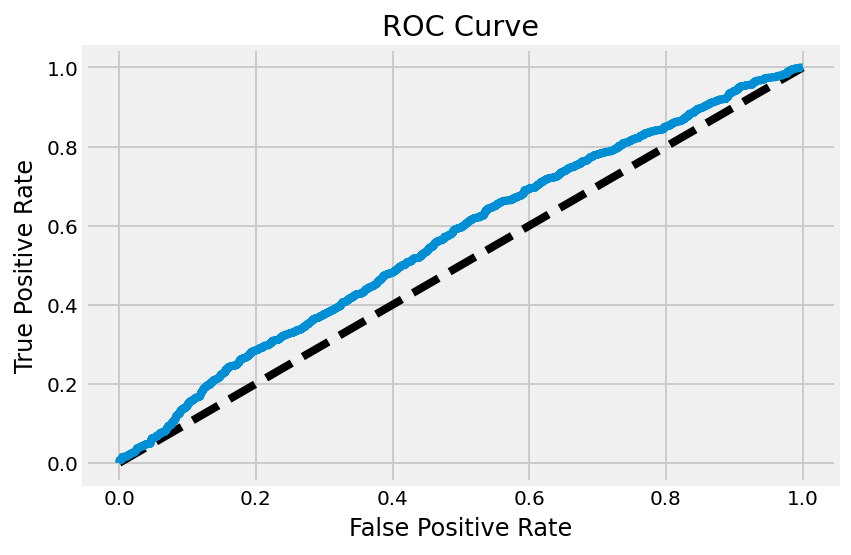

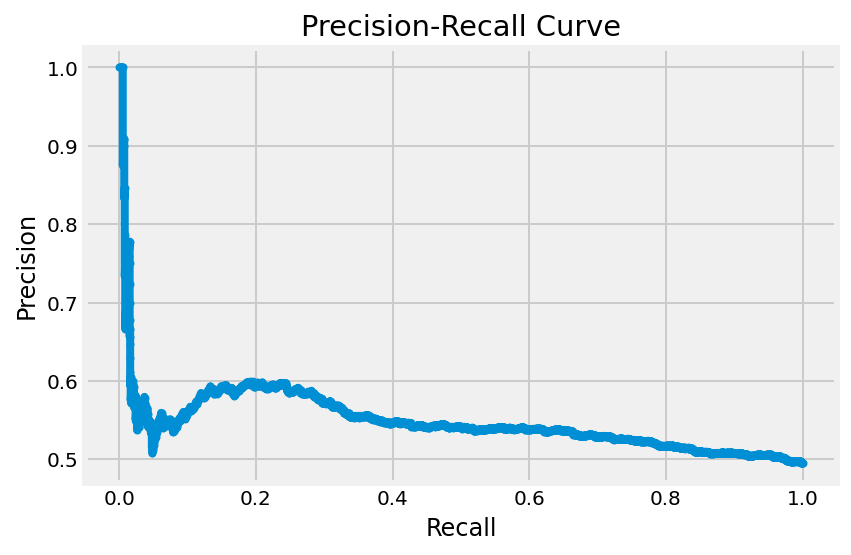

In [126]:
get_metrics(link_tr, link_ytr, link_test, link_ytest, cv_etc.best_estimator_)


In [127]:
link_importances = get_importances(link_tr, link_ytr, cv_etc.best_estimator_)


In [128]:
link_features = get_features(cv_etc.best_estimator_, link_tr, link_ytr, link_importances, link_cols)


In [129]:
link_features


,Technical_Indicator,Importance
index,,
0,momentum_stoch_rsi,0.056907
1,momentum_stoch,0.032984
2,momentum_wr,0.031985
3,volatility_dcp,0.031879
4,volatility_kcli,0.030234
...,...,...
78,volatility_kch,0.006275
79,trend_visual_ichimoku_b,0.006180
80,trend_psar_down_indicator,0.006120


''

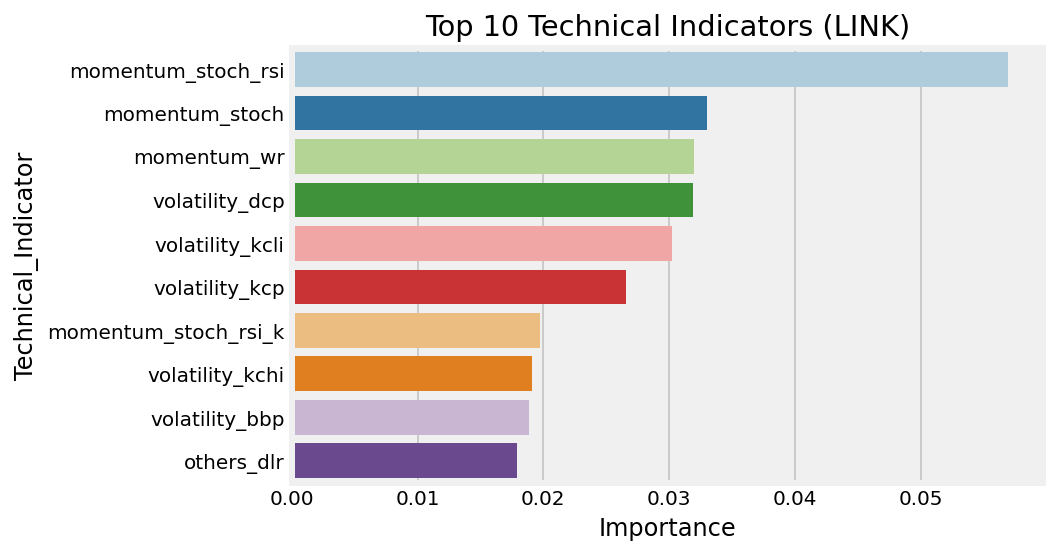

In [130]:
# Plots

sns.barplot(data=link_features.head(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Top 10 Technical Indicators (LINK)")
;


''

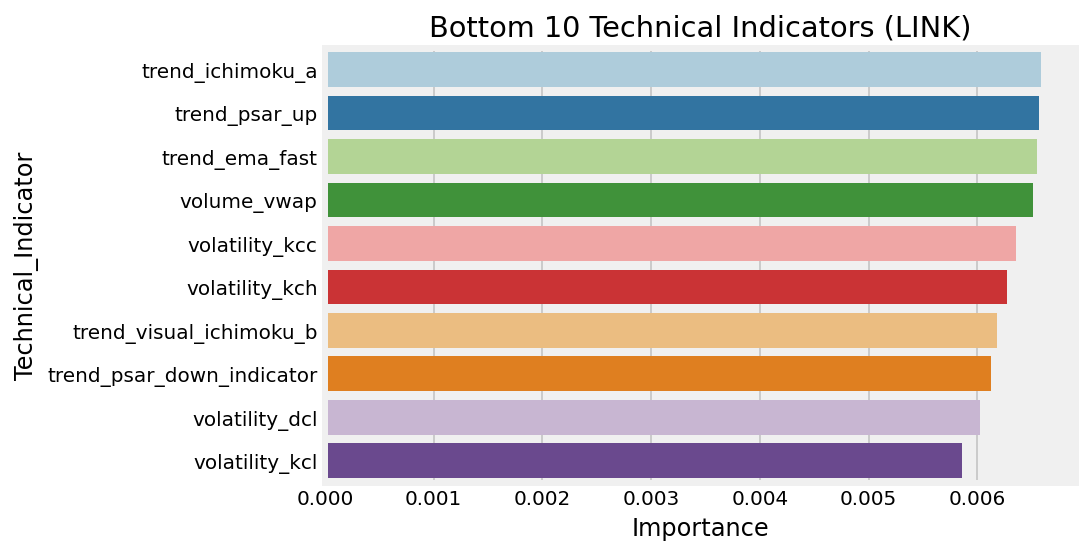

In [131]:
sns.barplot(data=link_features.tail(10), x='Importance', y='Technical_Indicator', palette='Paired')
plt.title("Bottom 10 Technical Indicators (LINK)")
;


# Model Review (fix or remove this)

#### Overview



#### Data Loading & Cleaning

All 6 cryptocurrency datasets, where each observation is an hourly account of their prices, were loaded via separate csvs and were cleaned by placing a chronological datetime index. Then we can begin feature engineering by creating shifted columns for our features/technical indicators by 1 period forward. A binarizer was also used to create our target variable, where 1 indicating the price increasing and 0 for the price decreasing/remaining stationary. After scaling our features with a MinMaxScaler, they were ready for classifier modeling.

#### Modeling

A total of


#### Gridsearching on best model

- BTC:
- ETH:
- LTC:
- XLM:
- DASH:
- LINK:

#### Model metrics

- 


#### Feature Importances

#### Summary

# Phase 4c and beyond (post course): 

- Deep Learning Models - LSTM, GARCH, etc. to significantly improve model scores
- Use with continuous live data - smaller interval periods? (More suitable for swing trading as opposed to day trading)
- Trading Bot (simulated data)
- Trading App (will have to explore the developer route)